In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 2245
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.mvsa_bigru_vgg import *
from utils.train import *
from typing import *
from utils.load_mvsa import *
from utils.dataset import *
from utils.train import *
from utils.train import *

config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 100,
 'output_size': 3,
 'dropout': 0.5}

In [3]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Setting up a new session...


{'Total': 1790703, 'Trainable': 531803} CrossEntropyLoss()


No 1 epoch: 119it [00:20,  5.85it/s]
No 2 epoch: 119it [00:02, 56.31it/s]
No 3 epoch: 119it [00:02, 58.10it/s]
No 4 epoch: 119it [00:02, 58.22it/s]
No 5 epoch: 119it [00:02, 54.00it/s]
No 6 epoch: 119it [00:02, 55.58it/s]
No 7 epoch: 119it [00:02, 57.58it/s]
No 8 epoch: 119it [00:02, 56.12it/s]
No 9 epoch: 119it [00:02, 57.11it/s]
No 10 epoch: 119it [00:02, 57.54it/s]
No 11 epoch: 119it [00:02, 55.77it/s]
No 12 epoch: 119it [00:02, 56.80it/s]
No 13 epoch: 119it [00:02, 53.87it/s]


CPU times: user 25.4 s, sys: 4.27 s, total: 29.7 s
Wall time: 58.6 s


In [4]:
res

{'min_valid_loss': 0.7013890879785508,
 'min_valid_loss_epoch': 3,
 'min_loss_train_acc': 0.5938864628820961,
 'min_valid_loss_train_loss': 0.8196927407470285,
 'min_loss_valid_acc': 0.6526399364827312,
 'last_valid_acc': 0.6558157999206035,
 'last_train_acc': 0.6769882228397512,
 'last_epoch': 13,
 'last_train_loss': 0.675063792471692,
 'last_valid_loss': 0.7468454477663029}

In [5]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6710265556876734, 0.6505249143691657), 0.7042974954411193)

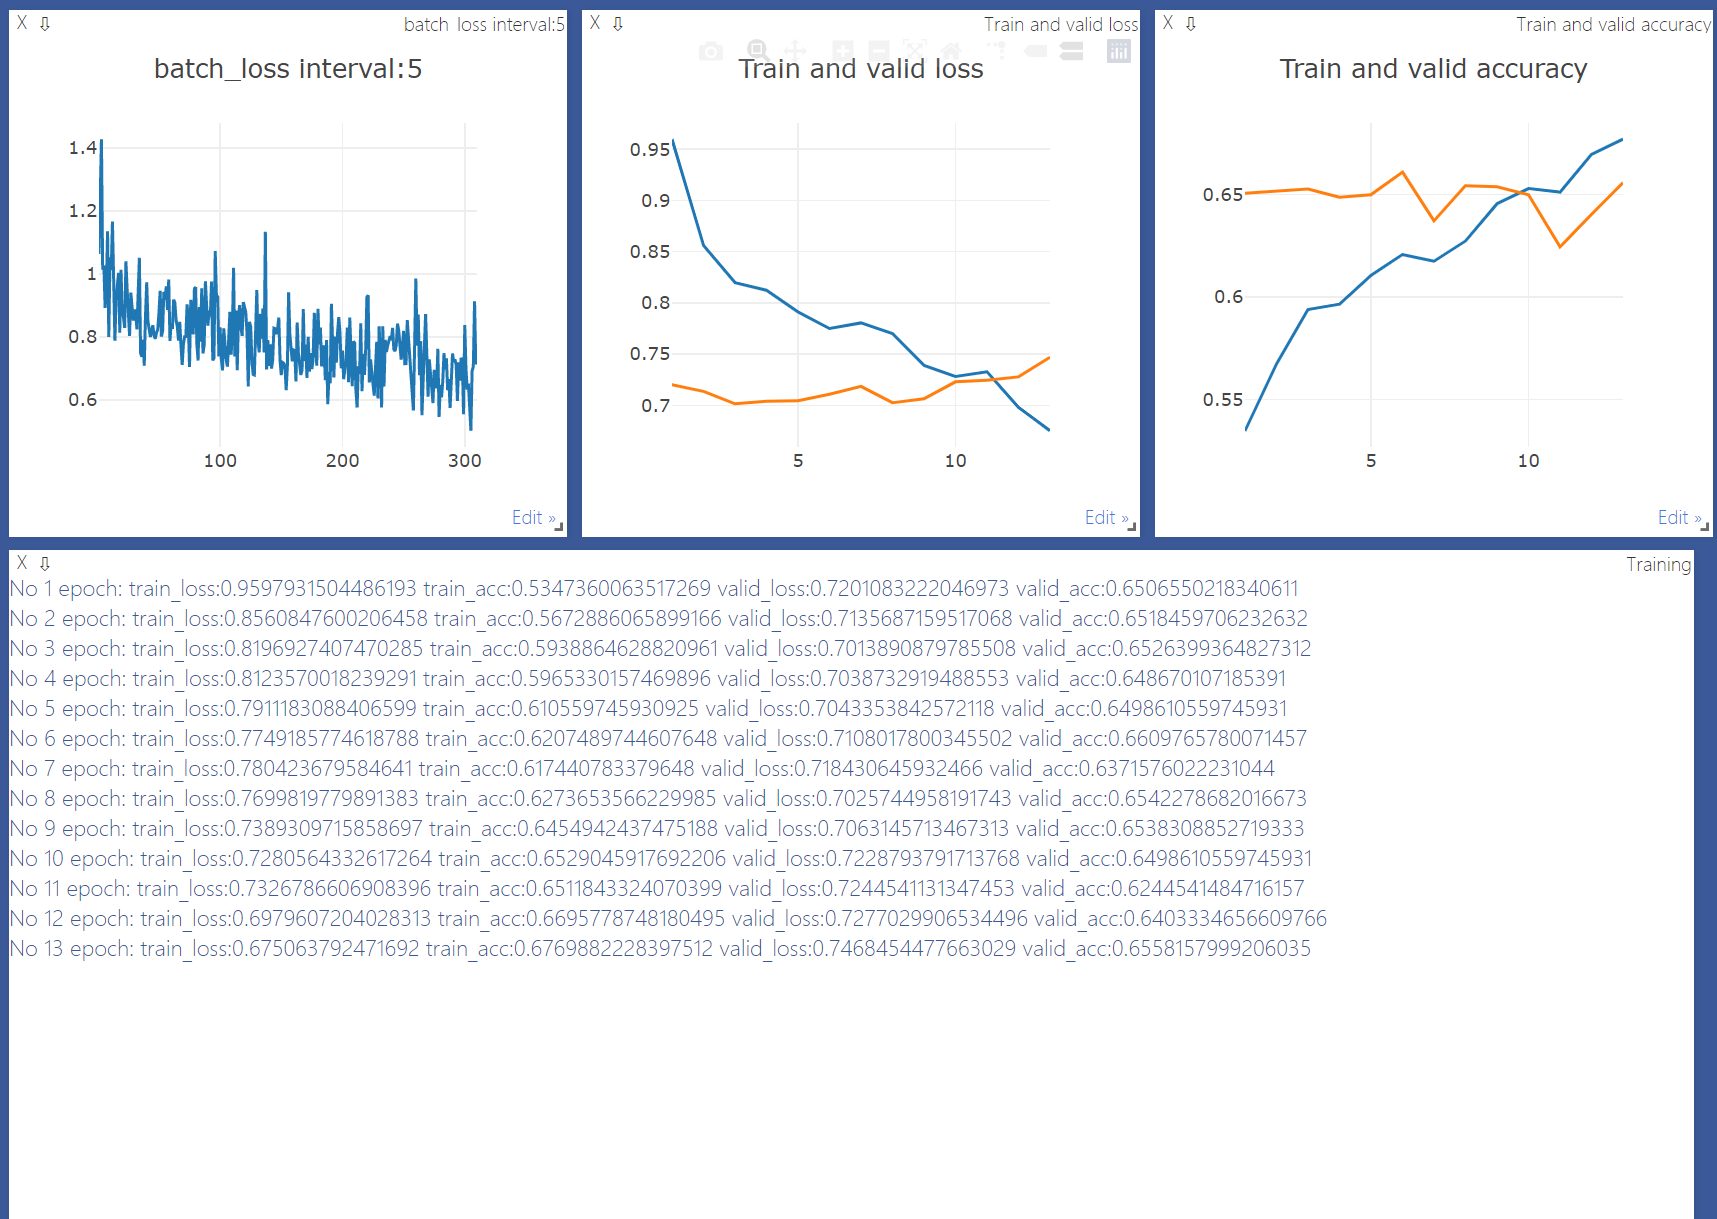

In [2]:
config["use_img"] = False
config


{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': False,
 'img_input_size': 4096,
 'img_output_size': 100,
 'output_size': 3,
 'dropout': 0.5}

In [3]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Setting up a new session...


{'Total': 1380703, 'Trainable': 121803} CrossEntropyLoss()


No 1 epoch: 119it [00:02, 53.74it/s]
No 2 epoch: 119it [00:02, 53.33it/s]
No 3 epoch: 119it [00:02, 58.60it/s]
No 4 epoch: 119it [00:02, 58.73it/s]
No 5 epoch: 119it [00:02, 53.14it/s]
No 6 epoch: 119it [00:01, 59.52it/s]
No 7 epoch: 119it [00:02, 53.31it/s]
No 8 epoch: 119it [00:02, 54.28it/s]
No 9 epoch: 119it [00:02, 55.46it/s]
No 10 epoch: 119it [00:02, 54.52it/s]
No 11 epoch: 119it [00:02, 57.08it/s]
No 12 epoch: 119it [00:02, 57.31it/s]
No 13 epoch: 119it [00:02, 54.97it/s]
No 14 epoch: 119it [00:02, 56.22it/s]
No 15 epoch: 119it [00:02, 51.41it/s]
No 16 epoch: 119it [00:02, 56.21it/s]


CPU times: user 29.7 s, sys: 5.31 s, total: 35 s
Wall time: 50.1 s


In [4]:
res

{'min_valid_loss': 0.7024926750041891,
 'min_valid_loss_epoch': 6,
 'min_loss_train_acc': 0.5950774116712981,
 'min_valid_loss_train_loss': 0.8067743733270909,
 'min_loss_valid_acc': 0.6621675267963477,
 'last_valid_acc': 0.6363636363636364,
 'last_train_acc': 0.6888977107317719,
 'last_epoch': 16,
 'last_train_loss': 0.653317194554767,
 'last_valid_loss': 0.7845377102878748}

In [5]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6627031311930242, 0.6228818160235917), 0.7101751639405461)

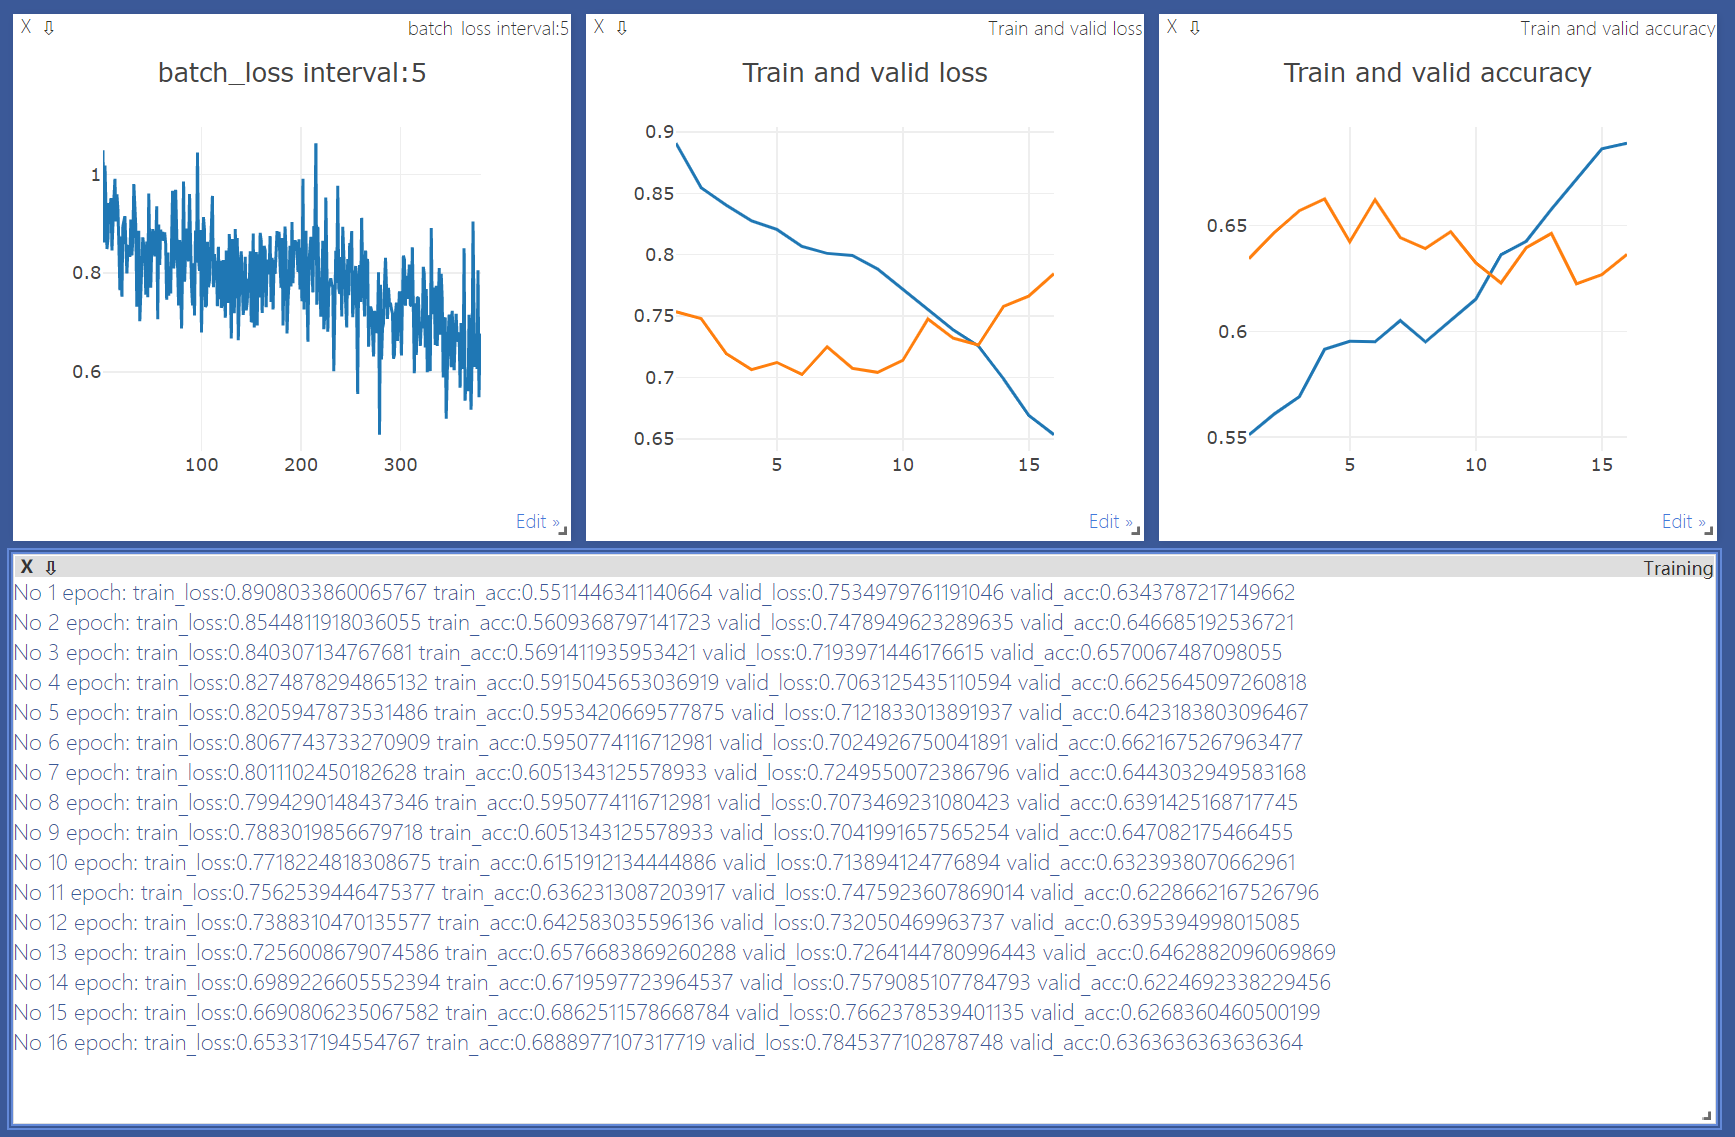

In [2]:
## 调参
config["embedding_dim"] = 50
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 50,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 50,
 'output_size': 3,
 'dropout': 0.5}

In [3]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

100%|██████████| 1193514/1193514 [00:23<00:00, 51646.86it/s]
/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Setting up a new session...


{'Total': 1131253, 'Trainable': 501803} CrossEntropyLoss()


No 1 epoch: 119it [00:01, 67.00it/s]
No 2 epoch: 119it [00:01, 60.88it/s]
No 3 epoch: 119it [00:01, 64.40it/s]
No 4 epoch: 119it [00:01, 64.18it/s]
No 5 epoch: 119it [00:01, 62.88it/s]
No 6 epoch: 119it [00:02, 58.34it/s]
No 7 epoch: 119it [00:01, 62.15it/s]
No 8 epoch: 119it [00:01, 62.28it/s]
No 9 epoch: 119it [00:01, 62.35it/s]
No 10 epoch: 119it [00:02, 58.64it/s]
No 11 epoch: 119it [00:01, 62.98it/s]
No 12 epoch: 119it [00:01, 60.91it/s]
No 13 epoch: 119it [00:01, 61.58it/s]
No 14 epoch: 119it [00:01, 60.52it/s]
No 15 epoch: 119it [00:01, 63.89it/s]
No 16 epoch: 119it [00:02, 55.54it/s]
No 17 epoch: 119it [00:02, 50.28it/s]


CPU times: user 1min 9s, sys: 14.2 s, total: 1min 24s
Wall time: 1min 27s


In [4]:
res

{'min_valid_loss': 0.6969228656862689,
 'min_valid_loss_epoch': 7,
 'min_loss_train_acc': 0.6223369061797009,
 'min_valid_loss_train_loss': 0.7792437600603618,
 'min_loss_valid_acc': 0.6550218340611353,
 'last_valid_acc': 0.6411274315204446,
 'last_train_acc': 0.6866481407966124,
 'last_epoch': 17,
 'last_train_loss': 0.6661702595849319,
 'last_valid_loss': 0.7751862480674485}

In [5]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6531906460562822, 0.6206767243134643), 0.706405560648068)

In [3]:
## 调参
config["embedding_dim"] = 50
config["text_hidden_size"] = 50
config["img_output_size"] = 50
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 50,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 50,
 'output_size': 3,
 'dropout': 0.5}

In [4]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Setting up a new session...


{'Total': 865353, 'Trainable': 235903} CrossEntropyLoss()


No 1 epoch: 119it [00:01, 67.90it/s]
No 2 epoch: 119it [00:02, 55.91it/s]
No 3 epoch: 119it [00:02, 57.54it/s]
No 4 epoch: 119it [00:01, 63.88it/s]
No 5 epoch: 119it [00:01, 62.89it/s]
No 6 epoch: 119it [00:02, 57.77it/s]
No 7 epoch: 119it [00:01, 63.49it/s]
No 8 epoch: 119it [00:01, 59.76it/s]
No 9 epoch: 119it [00:02, 56.15it/s]
No 10 epoch: 119it [00:01, 65.21it/s]
No 11 epoch: 119it [00:01, 62.41it/s]
No 12 epoch: 119it [00:01, 61.13it/s]
No 13 epoch: 119it [00:01, 62.90it/s]
No 14 epoch: 119it [00:01, 60.73it/s]
No 15 epoch: 119it [00:02, 55.67it/s]
No 16 epoch: 119it [00:02, 57.39it/s]
No 17 epoch: 119it [00:02, 57.02it/s]
No 18 epoch: 119it [00:02, 57.26it/s]
No 19 epoch: 119it [00:01, 60.45it/s]
No 20 epoch: 119it [00:02, 58.19it/s]
No 21 epoch: 119it [00:02, 53.25it/s]


CPU times: user 37.7 s, sys: 7.3 s, total: 45 s
Wall time: 1min


In [5]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6611177170035671, 0.6349758650876364), 0.7077312201107961)

In [2]:
## 调参
config["embedding_dim"] = 25
config["text_hidden_size"] = 25
config["img_output_size"] = 25
config

{'task': 'CLS',
 'embedding_dim': 25,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 25,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 25,
 'output_size': 3,
 'dropout': 0.5}

In [3]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

100%|██████████| 1193514/1193514 [00:12<00:00, 92575.03it/s]
/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Setting up a new session...


{'Total': 425178, 'Trainable': 110453} CrossEntropyLoss()


No 1 epoch: 119it [00:02, 57.63it/s]
No 2 epoch: 119it [00:02, 57.08it/s]
No 3 epoch: 119it [00:02, 53.24it/s]
No 4 epoch: 119it [00:02, 54.94it/s]
No 5 epoch: 119it [00:02, 58.12it/s]
No 6 epoch: 119it [00:01, 63.16it/s]
No 7 epoch: 119it [00:02, 53.66it/s]
No 8 epoch: 119it [00:01, 60.69it/s]
No 9 epoch: 119it [00:02, 56.95it/s]
No 10 epoch: 119it [00:02, 56.04it/s]
No 11 epoch: 119it [00:02, 51.44it/s]
No 12 epoch: 119it [00:01, 61.85it/s]
No 13 epoch: 119it [00:01, 62.45it/s]
No 14 epoch: 119it [00:01, 61.79it/s]
No 15 epoch: 119it [00:02, 56.21it/s]
No 16 epoch: 119it [00:02, 58.64it/s]
No 17 epoch: 119it [00:02, 56.71it/s]


CPU times: user 1min, sys: 9.83 s, total: 1min 10s
Wall time: 1min 20s


In [4]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6535869996036464, 0.6329282416061809), 0.7123684146032889)

In [2]:
# 
config["embedding_dim"] = 50
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 100,
 'output_size': 3,
 'dropout': 0.5}

In [3]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 1131253, 'Trainable': 501803} CrossEntropyLoss()


No 1 epoch: 119it [00:02, 48.16it/s]
No 2 epoch: 119it [00:02, 50.68it/s]
No 3 epoch: 119it [00:02, 51.71it/s]
No 4 epoch: 119it [00:02, 50.16it/s]
No 5 epoch: 119it [00:02, 50.04it/s]
No 6 epoch: 119it [00:02, 48.15it/s]
No 7 epoch: 119it [00:02, 49.84it/s]
No 8 epoch: 119it [00:02, 49.25it/s]
No 9 epoch: 119it [00:02, 50.03it/s]
No 10 epoch: 119it [00:02, 50.50it/s]
No 11 epoch: 119it [00:02, 50.13it/s]
No 12 epoch: 119it [00:02, 51.89it/s]
No 13 epoch: 119it [00:02, 49.84it/s]
No 14 epoch: 119it [00:02, 47.28it/s]
No 15 epoch: 119it [00:02, 48.33it/s]
No 16 epoch: 119it [00:02, 47.70it/s]
No 17 epoch: 119it [00:02, 49.01it/s]
No 18 epoch: 119it [00:02, 48.03it/s]
No 19 epoch: 119it [00:02, 45.89it/s]


CPU times: user 43.1 s, sys: 8.6 s, total: 51.7 s
Wall time: 1min 5s


In [4]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  result = _VF.gru(input, batch_sizes, hx, self._flat_weights, self.bias,


((0.6599286563614745, 0.6454539121495722), 0.7103138424742567)

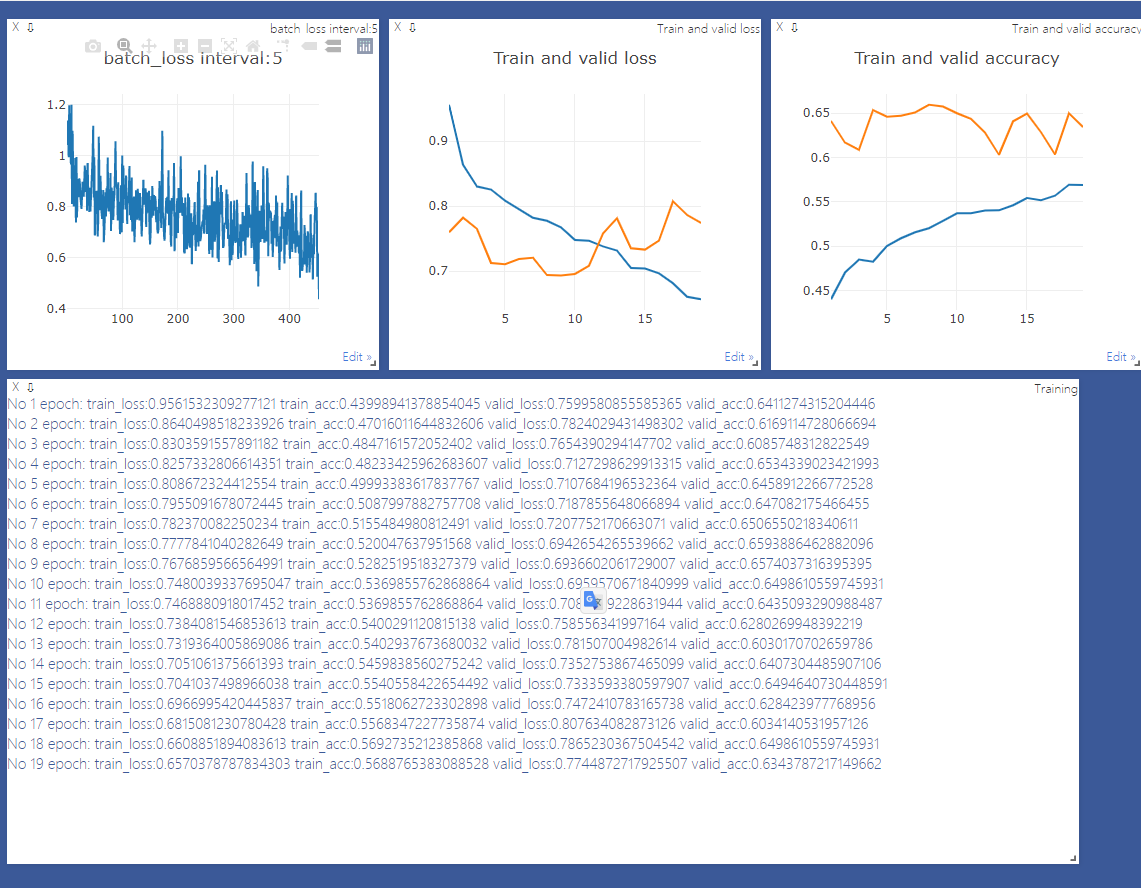

In [2]:
##
config["embedding_dim"] = 50
config["use_img"] = False
config

{'task': 'CLS',
 'embedding_dim': 50,
 'embedding': None,
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'bias_init': 1.0,
 'use_img': False,
 'img_input_size': 4096,
 'img_output_size': 100,
 'output_size': 3,
 'dropout': 0.5}

In [3]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
Setting up a new session...


{'Total': 721253, 'Trainable': 91803} CrossEntropyLoss()


No 1 epoch: 119it [00:02, 46.82it/s]
No 2 epoch: 119it [00:02, 47.20it/s]
No 3 epoch: 119it [00:02, 46.89it/s]
No 4 epoch: 119it [00:02, 44.70it/s]
No 5 epoch: 119it [00:02, 47.21it/s]
No 6 epoch: 119it [00:02, 46.66it/s]
No 7 epoch: 119it [00:02, 46.68it/s]
No 8 epoch: 119it [00:02, 44.55it/s]
No 9 epoch: 119it [00:02, 46.25it/s]
No 10 epoch: 119it [00:02, 46.40it/s]
No 11 epoch: 119it [00:02, 44.57it/s]
No 12 epoch: 119it [00:02, 43.68it/s]
No 13 epoch: 119it [00:02, 45.97it/s]
/home/ly/miniconda3/envs/torch1.7/lib/python3.8/site-packages/torch/nn/modules/rnn.py:742: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/cudnn/RNN.cpp:775.)
  result = _VF.gru(input, batch_sizes, hx, self._flat_weights, self.bias,


CPU times: user 33.9 s, sys: 7.2 s, total: 41.1 s
Wall time: 49.5 s


((0.6611177170035671, 0.6340082736060946), 0.7153975318170851)